<a href="https://colab.research.google.com/github/akarmanov2022/tusur-ai-1/blob/master/%D0%98%D0%98_%D0%9B%D0%A03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторная работа №3.**

**Python. Функциональная семантическая сеть**

**Цель работы.**

Ознакомление с пакетами pandas, matplotlib, Python. Разработка и исследование функциональной семантической сети.

**ВНИМАНИЕ**, для выполнения лабораторных работ вам **НЕОБХОДИМА** учетная запись Google.


---


# 1. Python


---


---

**Префиксные и инфиксные операторы** `*` и `**`

---

В Python много где можно встретить операторы `*` и `**`. Эти операторы используются, в том числе, как **инфиксные операторы** умножения и возведения в степень:

In [ ]:
print(2 * 5)
print(2 ** 5)

Операторы `*` и `**` также используются как **префиксные операторы**, **перед** переменными.
Случаи использования:
* Операторы используются `*` и `**` для передачи аргументов в функцию;
* Операторы используются `*` и `**` для сбора переданных в функцию аргументов;
* Оператор используется `**` для принятия только именованных аргументов;
* Оператор используется `*` при распаковке кортежей;
* Оператор используется `*` для распаковки итерируемых объектов в список/кортеж;
* Оператор используется `**` для распаковки словарей в другие словари.

In [ ]:
# При вызове функции можно использовать оператор *
# для распаковки итерируемого объекта в аргументы вызова
fruits = ['lemon', 'pear', 'watermelon', 'tomato']
# Строка print(*fruits) передаёт все элементы списка fruits
# в вызов print() как отдельные аргументы
print(fruits[0], fruits[1], fruits[2], fruits[3])
print(*fruits)
print(*fruits, *fruits)

In [ ]:
# Оператор **  позволяет взять словарь с парами ключ-значение и
# распаковать его в именованные аргументы в вызове функции
date_info = {'year': "2020", 'month': "01", 'day': "01"}
filename = "{year}-{month}-{day}.txt".format(**date_info)
filename

In [ ]:
# Стандартные функции Python print() и zip() принимают любое количество позиционных аргументов.
# Благодаря * можно написать свою функцию, работающую похожим образом.
# При определении функции можно использовать *, чтобы
# собрать переменное количество позиционных аргументов, переданных в функцию.

from random import randint

def roll(*dice):
    return sum(randint(1, die) for die in dice)

print(roll(20))
print(roll(6, 6))
print(roll(6, 6, 6))

In [ ]:
# Аналогично для именованных аргументов

def tag(tag_name, **attributes):
    attribute_list = [
        f'{name}="{value}"'
        for name, value in attributes.items()
    ]
    return f"<{tag_name} {' '.join(attribute_list)}>"

print(tag('a', href="http://example.com"))
print(tag('img', height=20, width=40, src="img.jpg"))

In [ ]:
# Стоит напомнить, что в Python при определении функции
# сначала идут неименованные аргументы, и только потом - именованные
# после оператора * в объявлении функции ВСЕГДА идут именованные аргументы
# вызов функции с именованными аргументами позволяет понять, какой аргумент за что отвечает.
# при использовании позиционных аргументов необходимо соблюдать их порядок,
# в то время как именованные аргументы можно расположить как угодно

# Для именованных аргументов можно задать значение по умолчанию
def get_multiple(*keys, dictionary, default=None):
    return [
        dictionary.get(key, default)
        for key in keys
    ]

fruits = {'lemon': 'yellow', 'orange': 'orange', 'tomato': 'red'}
get_multiple('lemon', 'tomato', 'squash', dictionary=fruits, default='unknown')
# а здесь - ошибка
get_multiple('lemon', 'tomato', 'squash', fruits, 'unknown')

In [ ]:
def with_previous(iterable, fillvalue=None):
    previous = fillvalue
    for item in iterable:
        yield previous, item
        previous = item

print(list(with_previous([2, 1, 3], fillvalue=0)))
print(list(with_previous([2, 1, 3], 0)))

# здесь оператор * позволяет сделать так,
# чтобы последующие именованные аргументы ВСЕГДА должны были передаваться по имени.
def with_previous(iterable, *, fillvalue=None):
    previous = fillvalue
    for item in iterable:
        yield previous, item
        previous = item

print(list(with_previous([2, 1, 3], fillvalue=0)))
# а здесь - ошибка
print(list(with_previous([2, 1, 3], 0)))

Еще, например, в определении sort() используется оператор `/`. Он нужен для того, чтобы предшествующие аргументы можно было передавать ТОЛЬКО как позиционные, а не по имени.

In [ ]:
help(sorted)

In [ ]:
# оператор * может применяться безотносительно функций, для распаковки кортежей
print([*('lemon', 'pear')])
print([('lemon', 'pear')])

In [ ]:
# оператор * может применяться безотносительно функций, для распаковки итерируемых объектов
print([iter(range(5))])
print([*iter(range(5))])

In [ ]:
fruits = ['lemon', 'pear', 'watermelon', 'tomato']
first, second, *remaining = fruits
print(fruits)
first, *remaining = fruits
print(fruits)
first, *middle, last = fruits
print(middle)

In [ ]:
# а здесь - ошибка
first, second, remaining = fruits
print(fruits)

In [ ]:
# Оператор ** можно использовать для объединения двух словарей
date_info = {'year': "2020", 'month': "01", 'day': "01"}
track_info = {'artist': "Beethoven", 'title': 'Symphony No 5'}
all_info = {**date_info, **track_info}
print(all_info)

In [ ]:
# А также для добавления новых значений
date_info = {'year': '2020', 'month': '01', 'day': '7'}
event_info = {**date_info, 'group': "Python Meetup"}
print(event_info)

In [ ]:
# Или перезаписи старых
event_info = {'year': '2020', 'month': '01', 'day': '7', 'group': 'Python Meetup'}
new_info = {**event_info, 'day': "14"}
print(new_info)


---


# 2. Пакет Pandas


---


**Pandas** это высокоуровневая Python библиотека для анализа данных.

В экосистеме Python, pandas является одной наиболее продвинутой и быстроразвивающейся библиотекой для обработки и анализа данных.

Pandas добавляет в Python новые структуры данных — **Series** и **DataFrame**.

Для подключения и использования библиотеки, её необходимо подключить следующей командой:


```
import pandas as pd
```

Конструкция `as`  позволяет переименовать библиотеку в более короткое название для удобства в дальнейшем при обращении к этой библиотеке и ее методам.



In [ ]:
import pandas as pd

##Структура данных Series

**Series** - одномерные массивы данных. Они очень похожи на списки, но отличаются по поведению — например, операции применяются к списку целиком, а в **Series** — поэлементно.

Конструктор класса Series выглядит следующим образом:



```
pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
```
- **data** – массив, словарь или скалярное значение, на базе которого будет построен Series;

- **index** – список меток, который будет использоваться для доступа к элементам Series. Длина списка должна быть равна длине data;

- **dtype** – объект numpy.dtype, определяющий тип данных;

- **copy** – создает копию массива данных, если параметр равен True в ином случае ничего не делает.

Создать структуру Series можно на базе различных типов данных:

- словари Python;
- списки Python;
- массивы из numpy: ndarray;
- скалярные величины.

### Создание Series из списка Python

In [ ]:
lst = [1, 2, 3, 4, 5] # создание списка Python

s = pd.Series(lst) # создание Series
# Если индекс явно не задан, то pandas автоматически создаёт RangeIndex от 0 до N-1, где N общее количество элементов.

s

In [ ]:
type(s)

In [ ]:
lst = ['Мария', 'Петр', 'Иван'] # создание списка Python

s = pd.Series(lst, ['a', 'b', 'c']) # создание Series с заданием меток (именованые метки - a, b, c)

s

In [ ]:
s['a']

###Создание Series из ndarray массива из numpy

In [ ]:
import numpy as np

ndarr = np.array([1, 2, 3, 4, 5])
type(ndarr)

In [ ]:
s2 = pd.Series(ndarr, ['a', 'b', 'c', 'd', 'e'])
s2

###Создание Series из словаря (dict)

In [ ]:
d = {'a':1, 'b':2, 'c':3}
s3 = pd.Series(d)
s3

###Создание Series с использованием константы

In [ ]:
a = 7

s4 = pd.Series(a, ['a', 'b', 'c'])

s4

У объекта **Series** есть атрибуты через которые можно получить список элементов и индексы, это **values** и **index** соответственно.

In [ ]:
print(s4.index)
print('_'*10)
print(s4.values)

###Работа с элементами Series

К элементам Series можно обращаться по численному индексу, при таком подходе работа со структурой не отличается от работы со списками в Python.

In [ ]:
# Создание Series из списка Python
s5 = pd.Series(['Иван', 'Петр', 'Мария', 'Анастасия', 'Федор'], ['a', 'b', 'c', 'd', 'e'])

# Обращание ко третьему элементу Series (нумерация начинается с 0)
print(s5[2])

Можно использовать метку, тогда работа с **Series** будет похожа на работу со словарем (dict) в Python.

In [ ]:
# Обращание ко третьему элементу Series по заданному индексу (нумерация начинается с 0)
print(s5['c'])

В поле для индекса можно поместить условное выражение.

In [ ]:
s6 = pd.Series([10, 13, 1, 5, 0], ['a', 'b', 'c', 'd', 'e'])

# Выведет все значения в Series меньше трех
s6[s6 <= 3]

In [ ]:
# Получение элементов с метками 'a', 'c' и 'e':
s6[['a', 'c', 'e']]

Обращение по слайсу (срезу) меток.

Получение элементов структуры с метками от 'a' до 'd':

In [ ]:
s6['a':'d']

In [ ]:
pd.Series([10, 13, 1, 5, 0], ['d', 'b', 'c', 'a', 'e'])['d':'a']

In [ ]:
pd.Series([10, 13, 1, 5, 0], ['d', 'b', 'c', 'a', 'e'])['a':'e']

Получение элементов структуры с индексами от 0 до 4:

In [ ]:
s6[0:4]

###Работа с Series

Со структурами Series можно работать как с векторами: складывать, умножать вектор на число и т.п.

In [ ]:
s7 = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd', 'e'])
s8 = pd.Series([1, 1, 1, 1, 0], ['a', 'b', 'c', 'd', 'e'])

# сложение
# к каждому элементу s7 прибавляется каждый элемент s8
# для корректного сложения необходимо, чтобы длина Series совпадала
s9 = s7 + s8
s9

In [ ]:
# Каждый элемент s7 увеличится в 3 раза
s9 = s7 * 3

s9

##Структура данных DataFrame

Если **Series** представляет собой одномерную структуру, которую для себя можно представить как таблицу с одной строкой, то **DataFrame** – это уже двумерная структура – полноценная таблица с множеством строк и столбцов.

Конструктор класса DataFrame выглядит так:



```
pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
```

- **data** – массив ndarray, словарь (dict) или другой DataFrame;

- **index** – список меток для записей (имена строк таблицы);

- **columns** – список меток для полей (имена столбцов таблицы);

- **dtype** – объект numpy.dtype, определяющий тип данных;

- **copy** – создает копию массива данных, если параметр равен True в ином случае ничего не делает.

Cтруктуру **DataFrame** можно создать на базе:

- словаря (dict) в качестве элементов которого должны выступать: одномерные - ndarray, списки, другие словари, структуры Series;
- двумерные ndarray;
 структуры Series;
- структурированные ndarray;
- другие DataFrame.



###Создание DataFrame из словаря

In [ ]:
import pandas as pd

d = {"Name":pd.Series(['Виктор', 'Мария', 'Иван']),
     "Age": pd.Series([18, 21, 19])}

df = pd.DataFrame(d)
df

In [ ]:
# А если размерность серий не совпадает, то заполнение NaN
d2 = {"Name":pd.Series(['Виктор', 'Мария', 'Иван']),
     "Age": pd.Series([18, 21])}

pd.DataFrame(d2)

###Создание DataFrame из списка словарей

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)
df

In [ ]:
d = [{"Name1": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)
df

###Создание DataFrame из двумерного массива

In [ ]:
import numpy as np

nda = np.array([[1, 2, 3], [10, 20, 30]])

df = pd.DataFrame(nda)
df

###Работа с элементами DataFrame

Обращение к столбцу DataFrame:

- df['Название столбца']
- df.название_столбца

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)

df['Name']

In [ ]:
df.Name

Также для работы со строками и столбцами существуют методы:

**DataFrame.loc[]**- Доступ к группе строк и столбцов (или только к столбцам, или только к строкам) по меткам (label-based) или логическому массиву.

Допустимые входы:
- Одиночная метка, например 5 или 'a', (обратите внимание, что 5 - интерпретируется как метка индекса, а не как целочисленная позиция по индексу).
- Список или массив меток, например ['a', 'b', 'c']
- Объект среза с метками, например 'a':'f'.

**DataFrame.iloc[]** - позволяет получить доступ к элементам DataFrame по целочисленном индексам.

Допустимые входы:
- Целое число, например 5.
- Список или массив целых чисел, например .[4, 3, 0]
- Объект среза с целыми числами, например 1:7.

In [ ]:
df.iloc[0] # по индексу вернет 0 строку DataFrame

In [ ]:
df.loc[0:, "Name"]

Для доступа к элементам и по строке и по столбцу используется следующая конструкция:

- DataFrame.iloc[строка, столбце]
- DataFrame.iloc[диапазон:строк, диапазон:столбцов]

In [ ]:
df.iloc[0,1] # по индексу вернет элемент DataFrame на пересечении 0 строки и 1 столбца [строка, столбца]

df.iloc[:, 1] # вернет все элементы 1 столбца для всех строк

df.iloc[0:2,:] # вернет значения всех стобцов для 0 и 1 строк

In [ ]:
#[dimension 1
#    [dimension 2
#        [ dimension 3 ]
#    ]
#    []
#    []
#    []
#]
# многомерная индексация как обращение ко вложенным одномерным массивам
df.iloc[0, 1] # 1 строка, 2 столбец

In [ ]:
df.loc[:, 'Name'] # доступ по метке: вернет значения всех элементов в столбце Name для всех строк

df.loc[0:1, 'Name'] # доступ по метке: вернет значения всех элементов в столбце Name для 0 и 1 строк

Методы .loc[], .iloc[] также применимы к структуре Series.

Также в поле для индекса можно писать логические условия для фильтрации значений.

In [ ]:
#  Вывести все строки, в которых значение в столбце Age больше и равно 20
df[df['Age'] >= 20]

###Методы и атрибуты DataFrame

У объекта DataFrame (также как и у Series) есть атрибуты через которые можно получить индексы, а также метод позволяющий получить названия колонок.

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)

print(df.index) # возвращает индексы DataFrame
print(df.columns) # возвращает названия колонок
print(df.head(2)) # вывод первых двух строк DataFrame
print(df.tail(2)) # вывод последних двух строк DataFrame

In [ ]:
print(df[:2])

In [ ]:
print(df.head(2))

DataFrame - это двумерная структура, напоминающая таблицу размерностью NxM, где N - это количество строк, M - количество стобцов.

**shape** - атрибут DataFrame, который возвращает его размерность.

In [ ]:
df.shape

In [ ]:
df.info() # метод возвращает полную информацию о данном DataFrame

Часто при работе с данными, их необходимо проверять на пропуски (NaN).

Для этого существуют методы - **isna()**, **isnull()**.

Они возвращают два объекта DataFrame с булевыми значениями, где True для значений NaN в DataFrame, а False — на его отсутствие. Эти функции часто используются в фильтрах для создания условий.

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19}]

df = pd.DataFrame(d)

df.isna()

In [ ]:
df.isnull()

In [ ]:
# Фильтр, который вернет все строки, в которых отсутствуют пустые значения в колонке Age

df[df['Age'].isnull()==False]

In [ ]:
# подсчет пустых значений в каждой колонке DataFrame
df.isna().sum()

In [ ]:
df['Name'].unique()


In [ ]:
np.unique(df['Name'], return_counts=True)

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25}]

df = pd.DataFrame(d)

# Подсчет уникальных значений в стобце
df['Name'].unique()

# Подсчет количества вхождений для каждого уникального значения в столбце
df['Name'].value_counts()

Удаление значений из DataFrame.

Существуют различные методы, позволяющие удалять сроки или столбцы из DataFrame.

`DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')`

- labels - Метки индекса или столбца, которые нужно удалить
- axis - {0 или 'index', 1 или 'columns'}
- index - Альтернатива указанию оси (эквивалент axis=0)
- columns - Альтернатива указанию оси (эквивалент axis=1)
- level - Для MultiIndex - уровень, с которого будут удалены метки
- inplace - Если False, вернет копию DataFrame. В противном случае перезапишет изменения в этот же DataFrame.


In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25}]

df = pd.DataFrame(d)

# Удалить столбцы
df.drop(['Age'], axis=1)

In [ ]:
# по умолчанию inplace = False, поэтому в предыдущей ячейке
# операция drop() вернула копию измененного DataFrame
# исходный DataFrame остался без изменений
df

In [ ]:
df.drop(['Age'], axis=1, inplace=True)
df

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25}]

df = pd.DataFrame(d)

df.drop(columns=['Age'])

In [ ]:
df

In [ ]:
df.drop([0, 1])

Также существует метод dropna(), который позволяет удалять строки или столбцы, содержащие пустые значения.

`DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)`

- axis - {0 или 'index', 1 или 'columns'}, по умолчанию 0. Определяет, удаляются строки или столбцы, содержащие отсутствующие значения. 0 или «index»: удалить строки, содержащие пропущенные значения. 1 или «columns»: удалить столбцы, содержащие отсутствующее значение.
- how - Определяет, удаляется ли строка или столбец из DataFrame, когда у нас есть хотя бы одно NA или все NA. 'any': если присутствуют какие-либо значения NA, отбросьте эту строку или столбец. 'all': если все значения - NA, отбросьте эту строку или столбец.

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": np.NaN},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": np.NaN, "Age": np.NaN}]

df = pd.DataFrame(d)
df

In [ ]:
# удалить строки (axis=0), которые содержат хотя бы одно пропущенное значение
df.dropna(axis=0, how='any')

In [ ]:
# удалить столбцы (axis=1), которые содержат хотя бы одно пропущенное значение
df.dropna(axis=1, how='any')

In [ ]:
# удалить строки (axis=0), которые содержат только пропущенные значения
df.dropna(axis=0, how='all')

In [ ]:
# удалить столбцы (axis=1), которые содержат только пропущенные значения
df.dropna(axis=1, how='all')

Добавление строк или столбцов в существующий DataFrame.

Добавить новый столбец в существующий DataFrame можно воспользовавшись следующей конструкцией:

`df['new_column'] = values`

- values - значения в новом столбце (числов, список, Series)


In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)

df

In [ ]:
# Добавление нового столбца - значения которого переданы в виде списка
df['Phone'] = ['asd1', 'asd2', 'asd3', 'asd4', 'asd5']

df

In [ ]:
# Добавление нового столбца - все значения будут одинаковы и равны 'bachelor'
df['level'] = 'bachelor'
df

Также существует метод позволяющий объединять объекты Series и DataFrame.

`pandas.concat( objs , axis = 0 , join = 'outer' , ignore_index = False , keys = None , levels = None , names = None , verify_integrity = False , sort = False , copy = True )`

- objs последовательность или сопоставление объектов Series или DataFrame
- ось {0 / 'index', 1 / 'columns'}, по умолчанию 0. Ось для объединения (объединение по столбцам или по строкам).


In [ ]:
# Объединение двух Series
# так как параметр ignore_index по умолчанию False
# то сохраняется старая нумерация в Series
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

In [ ]:
# Объединение двух Series
# очистить существующий индекс и сбросить его в результате
# можно задав ignore_index=True
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2], ignore_index=True)

In [ ]:
# Объединение двух DataFrame
df1 = pd.DataFrame([['Петр', 19], ['Иван', 22]], columns=['Name', 'Age'])
df1

In [ ]:
df2 = pd.DataFrame([['Мария', 20], ['Анастасия', 18]], columns=['Name', 'Age'])
df2

In [ ]:
#  объединение по строкам
pd.concat([df1, df2])

In [ ]:
# объединение по столбцам
pd.concat([df1, df2], axis=1)

## Импорт данных

Для создания DataFrame можно использовать внешние данные, например из файлов .csv или  .xlsx.

**CSV** (Comma-Separated Values — значения, разделённые запятыми) — текстовый формат, предназначенный для представления табличных данных.

Каждая строка - это отдельная строка таблицы, а столбцы отделены один от другого специальными символами - разделителями (например, запятой).

Для загрузки .csv файла с данными в pandas используется функция **read_csv()**.

У функции есть ряд ключевых параметров:
- filepath_or_buffer - путь к файлу, который необходимо считать
- sep - Используемый разделитель

По умолчанию предполагается, что поля разделены запятыми.

In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_data/california_housing_test.csv", sep=',')
df.head(10)

In [ ]:
df[:10]

Существует аналогичная функция для чтения данных с Excel.

## Экспорт данных

DataFrame и Series можно сохранять в виде файлов .csv и .xlsx

`DataFrame.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.', errors='strict', storage_options=None)`

- path_or_buf - пусть к файлу
- sep - Строка длиной 1. Разделитель полей для выходного файла.

Чтобы записать отдельный объект в файл Excel .xlsx, необходимо только указать имя целевого файла. Для записи на несколько листов необходимо создать объект ExcelWriter с именем целевого файла и указать лист в файле для записи.

`DataFrame.to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None, storage_options=None)`

In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)

df.to_csv("my")

In [ ]:
df.to_csv("to_csv_func_test.csv", index=False)

In [ ]:
# можно сохранять прямо в архиве
compression_opts = dict(method='zip',
                        archive_name='out.csv')
df.to_csv("to_csv_func_test.zip", index=False,
          compression=compression_opts)

In [ ]:
# архивация на колабе
!zip -r /content/zip_test.zip /content/sample_data

In [ ]:
# распаковка
!unzip /content/zip_test.zip -d /content/sample_data2

In [ ]:
# запись в xlsx файл
with pd.ExcelWriter('output.xlsx') as writer:
    df.to_excel(writer, sheet_name='Sheet_name_1')
    df.to_excel(writer, sheet_name='Sheet_name_2')
df = pd.read_excel("output.xlsx")
df


---


# 3. Визуализация данных в Python


---


# Matplotlib

[Matplotlib](https://matplotlib.org/) - базовый модуль для построения графиков в Python. Кроме matplotlib существуют и более сложные инструменты для построения графиков, мы коснёмся их в данном уроке лишь чуть-чуть.

In [ ]:
# проверяем установку модуля
!pip install matplotlib

In [ ]:
#классический вариант подключения модуля
#Модуль pyplot — это коллекция функций в стиле команд, которая позволяет использовать matplotlib почти так же, как MATLAB.
import matplotlib.pyplot as plt

#### Небольшое отвлечение в сторону

В google colab по-умолчанию графики отображаются встроенными в ноутбук. Однако в других случаях это происходит не всегда. Проверить, встроены ли графики в ноутбук или отделены можно с помощью команды

```
matplotlib.get_backend()
```
Сделать так, чтобы они были встроены с помощью


```
%matplotlib inline
```
В большинстве случаев лучше по умолчанию использовать эту команду, чтобы не было проблем с переносом кода на другие устройства и платформы.




In [ ]:
import matplotlib
matplotlib.get_backend()

In [ ]:
%matplotlib inline

## Первое знакомство

Просто график можно пострость с помощью метода `plot(x, y)`.

In [ ]:
plt.plot([1, 2, 3, 4, 5], [1, 2, -1, 4, 5])
# если не добавить команду show(), то кроме самого графика, в ноутбуке отборазится ещё и название используемого объекта.
plt.show()

In [ ]:
import numpy as np

In [ ]:
# то же самое, но используем команду numpy для создания дискретного набора от 0 до 5 (50 точек)
x = np.linspace(0, 5, 50)
y = x

In [ ]:
plt.title("Линейная зависимость y = x") # подпись для заголовка
plt.xlabel("x") # подись для оси х
plt.ylabel("y") # подись для оси y
plt.grid()      # включение отображение крупной сетки
plt.plot(x, y)
plt.show()

In [ ]:
plt.title("y = x и y=x^3")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
# можно менять цвет и формат вывода графика, вариантов много
plt.plot(x, y, "r*", label='y=x')
plt.plot(x, [i**3 for i in x], "g*", label='y=x^3')
plt.legend()
plt.show()

## Несколько графиков

In [ ]:
y1 = x
y2 = [i**3 for i in x]

# Построение графиков
plt.figure(figsize=(9, 9)) # создаём фигуру и задаём её размеры
plt.subplot(2, 1, 1) # выбираем нужную фигуру
plt.plot(x, y1)
plt.plot(x, y2)
plt.ylabel("y1", fontsize=14)
plt.grid(True)
plt.subplot(2, 1, 2) # выбираем следующую фигуру
plt.plot(x, y2, c='r')
plt.xlabel("x", fontsize=14)
plt.ylabel("y2", fontsize=14)
plt.grid(True)

In [ ]:
# размер меньше, чем у фигур выше
# оба графика на одной фигуре
plt.xlabel("x")
plt.ylabel("y1, y2")
plt.grid()
plt.scatter(x, y1, x, y2) # цвета графиков будут задавать последовательно в стандартном порядке
plt.show()

In [ ]:
# размер меньше, чем у фигур выше
# оба графика на одной фигуре
plt.xlabel("x")
plt.ylabel("y1, y2")
plt.grid()
plt.plot(x, y1) # цвета графиков будут задавать последовательно в стандартном порядке
plt.plot(x, y2)
plt.show()

На всякий случай мы подобрали картинку, которая показывает разные параметры фигуры в библиотеке matplotlib

![Разные параметры диаграммы.py](https://drive.google.com/uc?id=1Y1dDMy991toCzuLIb-tctWSs18FGzMfZ)

## Диаграмма разброса точек

Следующий популярный вид графика - график разброса точек. При построении этого графика используем другой подход, нежели использовали раннее. Поработаем с объектами.

Заметим, что получить график разброса точек можно и из обычного графка plot. Но при профессиональном использовании scatter даёт больше возможностей.

In [ ]:
x = np.random.rand(1000)    #  x - координаты точек
y = np.random.rand(1000)    #  y - координаты точек

fig, ax = plt.subplots(2, 2)

ax[0, 0].scatter(x, y, c = 'deeppink')    #  цвет точек
ax[1, 0].scatter(x, y, c = 'red')    #  цвет точек
x2 = np.linspace(0, 5, 50)
y2 = x2
ax[0, 1].plot(x2, y2, c = 'red')    #  цвет точек
x2 = np.linspace(0, 5, 50)
y2 = np.cos(x2)
ax[1, 1].plot(x2, y2, c = 'blue')    #  цвет точек

#ax.set_facecolor('black')     #  цвет области Axes

plt.show()

Построим чуть более сложный вариант, на котором разместим данные разного типа.

In [ ]:
x = np.random.rand(5000)
# создадим четыре варианта данных в случайном диапазоне, используя гамма-распределение (или любое другое)
# количество точек - 5000
y1 = np.random.gamma(1, size = 5000)
y2 = np.random.gamma(2, size = 5000)
y3 = np.random.gamma(4, size = 5000)
y4 = np.random.gamma(8, size = 5000)

fig, ax = plt.subplots()

# s определяет размер точек
# ключ цвета из {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}:
ax.scatter(x, y1, c = 'r', s = 1)
# RGB:
ax.scatter(x + 1, y2, c = [[0.1, 0.63, 0.55]], s = 5)
# hex RGB:
ax.scatter(x + 2, y3, c = '#ad09a3', s = 10)
# уровень серого в интервале [0, 1]:
ax.scatter(x + 3, y4, c = ['0.4'], s = 20)

#  Увеличим размер графика:
fig.set_figwidth(14)
fig.set_figheight(14)

plt.show()

## Гистограммы

Крайне популярный вариант диаграмм, который показывает сколько объектов (в общечеловеческом смысле) относятся к тому или иному типу. Иначе говоря, распределение объектов по разным типам или классам.

In [ ]:
x = np.arange(1, 5)
y = np.random.randint(1, 20, size = 4)

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('black') # обратите внимание, что теперь можно явно видеть часть figure и часть axes на графике.
fig.set_facecolor('floralwhite')

plt.show()


Можно создавать несколько диаграм на разных частях фигуры. Для этого нужно использовать команду subplots.

В случае с гистограммами это крайне важно, так как иначе они начинают перекрывать друг друга.

In [ ]:
x1 = np.arange(1, 8)
y1 = np.random.randint(1, 20, size = 7)
x2 = np.arange(1, 51)
y2 = np.random.randint(1, 20, size = 50)

fig, axes = plt.subplots(2, 1)

axes[0].bar(x1, y1)
axes[1].bar(x2, y2)

axes[0].set_facecolor('yellow')
axes[1].set_facecolor('white')
fig.set_facecolor('floralwhite')

plt.show()

In [ ]:
x = np.arange(1, 8)
y1 = np.random.randint(1, 25, size = 7)
y2 = np.random.randint(1, 25, size = 7)

fig, ax = plt.subplots()

ax.bar(x, y1)
ax.bar(x, y2)

fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax.set_title('На этой диаграмме одни столбики перекрывают другие столбики')

plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.bar(x-0.2, y1, width = 0.4) #небольшой лайфхак, сдвигаем позицию X и влево
# или вправо относительно центра расположения столбика, вместе с коррекцией
# ширины столбика
ax.bar(x+0.2, y2, width = 0.4)

plt.show()

## Несколько других видов графиков

### Коррелограмма

Данный вид графика используется для того, что визуализировать наличие корелляционной связи между различными рядами данных. Нам потребуется использовать графики такого типа. Для их использования необходимо подключить другой модуль seaborn.

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df = df.drop(['cars', 'carname'], axis=1)
df.corr()

In [ ]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
df = df.drop(['cars', 'carname'], axis=1)
# обратите внимание, pandas способен считывать данные из файла по ссылке

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns,
            yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Коррелограмма для набора данных mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Парные зависимости

Ещё один функциональный вариант графиков, который пригодится при работе с наборами данных из модуля sns. Визуализирует разброс каждой пары данных.

In [ ]:
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()


---


# 4. Пакет Networkx


---


**Граф** — это форма визуализации, позволяющая показывать и анализировать отношения между сущностями.

* **Узел (Node)** — фундаментальный элемент графа, общеизвестный под названием вершина.
* **Ребро (Edge)** — соединение узлов графа.

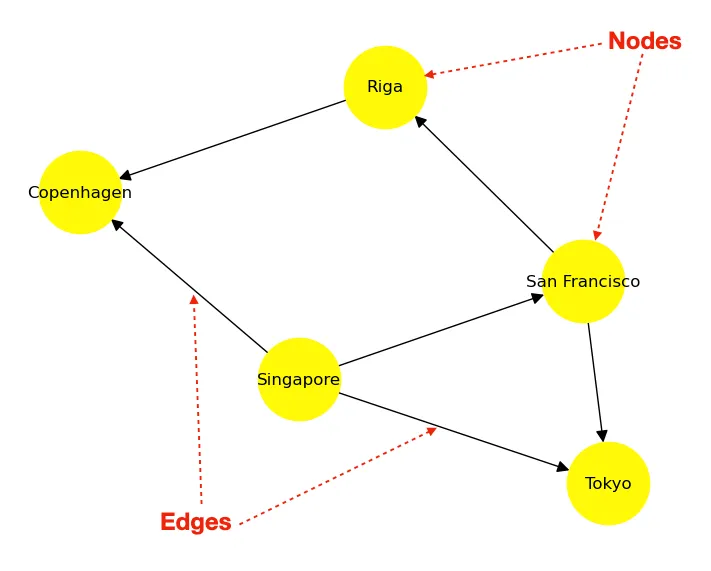



**Неориентированный граф** не имеет направления между узлами, то есть не имеет стрелок, а его ребра двунаправлены. Пример подобного графа приведен в следующей ячейке.

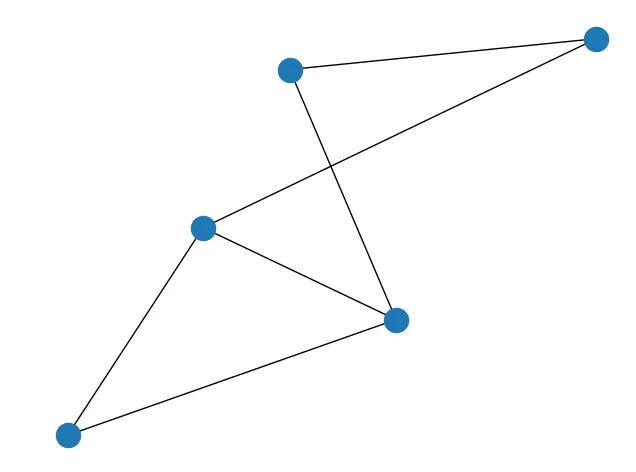

Пакет [NetworkX](https://networkx.org/documentation/stable/index.html#) предназначен для создания, манипуляции и изучения структуры, динамики и функционирования сложных сетевых структур, графов. Данный пакет понадобится в нам дальнейшем для реализации функциональной семантической сети.

По более формальному определению, граф - это набор узлов (вершин) вместе с идентифицированными парами узлов (называемыми ребрами, связями и т. д.). В NetworkX узлами могут быть любые хэшируемые объекты, например, текстовая строка, изображение, объект XML, другой граф, настраиваемый объект узла и т.д. (за исключением объекта Python - None)

NetworkX уже предустановлен в Google Colab. Если необходимо установить пакет локальной, воспользуйтесь следующей командой:

In [ ]:
!pip install networkx

Граф G может быть построен несколькими способами. NetworkX включает в себя  [множество функций генератора графов](https://networkx.org/documentation/stable/reference/generators.html), а также [средства для чтения и записи графов в различных форматах](https://networkx.org/documentation/stable/reference/readwrite/index.html). В целях реализации функциональной семантической сети, рассмотрим способы задания графа вручную. Функция `nx.Graph()` позволяет создать пустой неориентированный граф без вершин и ребер.

In [ ]:
import networkx as nx
G = nx.Graph()

Вершины можно добавлять по одной c помощью функции `add_node` и добавлять сразу несколько вершин, списком, с помощью функции `add_nodes_from`.

In [ ]:
G.add_node(1)
G.add_nodes_from([2, 3])

Функция `add_nodes_from` позволяет также добавлять вершины в форме кортежа `(node, node_attribute_dict)`, одновременно задавая хранимую в них информацию.

In [ ]:
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

Узлы из одного графа также могут быть включены в другой с помощью функции `add_nodes_from`, пример приведен в последующей ячейке кода

In [ ]:
H = nx.path_graph(10)
G.add_nodes_from(H)

Граф G теперь содержит узлы H как узлы G. В противоположность этому, можно использовать граф H как узел в G.

In [ ]:
G.add_node(H)

Граф G теперь содержит H как узел. Это позволяет создавать графы графов, графы файлов, графы функций и многое другое.

После задания вершин, необходимо добавить ребра графа. В граф G можно добавляя по одному ребру за раз с помощью функции `add_edge` или списком с помощью функции `add_edges_from` (передавая как кортежи `(node, node node_attribute_dict)`, да, ребра тоже могут хранить атрибуты):

In [ ]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)

In [ ]:
G.add_edges_from([(1, 2), (1, 3)])

In [ ]:
G.add_edges_from([(1, 2), (2, 3, {'weight': 3.1415})])
# можно передать и из другого графа
G.add_edges_from(H.edges)

`G.clear()` позволяет очистить граф от вершин и ребер.

`G.nodes` позволяет получить список узлов.

`G.edges` позволяет получить список ребер.

In [ ]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 'A'])
G.add_edges_from([(1, 2), (2, 3, {'weight': 3.1415}), ('A', 4)])
print(G.nodes)
print(G.edges)
G.clear()
print(G.clear())

Индексация графа по указанной вершине позволяет получить словарь соединенных с ней вершин:

In [ ]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 'A'])
G.add_edges_from([(1, 2), (2, 3, {'weight': 3.1415}), ('A', 3)])
print('Узлы, соединенные с узлом A:', G['A'])
print('Узлы, соединенные с узлом 2:', G[2])

Индексация графа **через параметры nodes и edges** позволяет изменить хранимые атрибуты:

In [ ]:
print(G.nodes['A'])
print(G.edges['A', 3])
G.nodes['A']['weight'] = 12
G.edges['A', 3]['weight'] = 12
G.edges[('A', 3)]['weight'] = 12
print(G.nodes['A'])
print(G.edges['A', 3])

NetworkX не является в первую очередь пакетом для рисования графов, но включены базовые возможности рисования с помощью Matplotlib, а также интерфейс для использования программного пакета Graphviz с открытым исходным кодом. Они являются частью модуля networkx.drawing. Для простого отображения графа можно использовать встроенный метод `draw`:

In [ ]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

In [ ]:
# можно кастомизировать настройки отображения
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

Существуют и иные функции, где можно еще больше кастомизировать отображение:

* nx.draw_networkx_nodes() — рисует все узлы графа;
* nx.draw_networkx_labels() — рисует метки на каждом узле;
* nx.draw_networkx_edges() — рисует ребра, соединяющие узлы.

Эти функции позволяют настраивать внешний вид отдельных узлов, меток и ребер.
Параметр pos позволяетс установить порядок компоновки и позиционирование ребер и вершин в целях отображения (по кругу, по свецифичным алгоритмам и т.д.)

In [ ]:
G = nx.Graph()
G.add_edge("Singapore","San Francisco")
G.add_edge("San Francisco","Tokyo")
G.add_edges_from(
    [
        ("Riga","Copenhagen"),
        ("Copenhagen","Singapore"),
        ("Singapore","Tokyo"),
        ("Riga","San Francisco"),
        ("San Francisco","Singapore"),
    ]
)

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels = True)
nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels={
        ("Singapore","Tokyo"): '2 flights daily',
        ("San Francisco","Singapore"): '5 flights daily',
    },
    font_color='red'
)

In [ ]:
G = nx.Graph()
G.add_edge("Singapore","San Francisco")
G.add_edge("San Francisco","Tokyo")
G.add_edges_from(
    [
        ("Riga","Copenhagen"),
        ("Copenhagen","Singapore"),
        ("Singapore","Tokyo"),
        ("Riga","San Francisco"),
        ("San Francisco","Singapore"),
    ]
)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels = True)
nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels={
        ("Singapore","Tokyo"): '2 flights daily',
        ("San Francisco","Singapore"): '5 flights daily',
    },
    font_color='red'
)


---


# 5. Функциональные семантические сети


---


**Знакомство с методологией построения функциональный семантических сетей**


---

Стандартного определения семантической сети не существует, но обычно под ней подразумевают систему знаний, имеющую определенный смысл в виде целостного образа сети, узлы которой соответствуют понятиям и объектам, а дуги – отношениям и связям. Подмножеством семантических сетей является сеть специального вида, носящая название  «**функциональная семантическая сеть**» (**ФСС**). Она представляется в виде графа с вершинами двух типов.

**Вершинам первого типа** соответствуют различные параметры, участвующие в решении задачи. Эти параметры могут либо задаваться как исходные данные, либо вычисляться по ходу выполнения будущей программы решения задач.

**Вершинам второго типа** соответствуют функциональные отношения, связывающие между собой эти параметры.  Поясним, как используется ФСС при решении конкретных задач, связанных с планированием вычислений. Пусть проблемная область – это планиметрия треугольника и необходимо решать задачи из планиметрии треугольника, вычисляя одни параметры через другие.  Причём исходными данными являются не формулы, а заранее заданные математические отношения ($\mathrm{R}_i$), поскольку до формулировки задачи не известно, что является исходными данными  и что должно быть результатом.

\begin{array}{|c|c|}
\hline & Математические \; отношения \\ \hline
\mathrm{R}_1 & \alpha + \beta + \gamma - \pi = 0 \\ \hline
\mathrm{R}_2 & (a / \sin \alpha) - (b / \sin \beta) \\ \hline
\mathrm{R}_3 & h_c - b \cdot (\sin \alpha) = 0 \\ \hline
\mathrm{R}_4 & c \cdot (\sin \gamma) - b \cdot (\sin \beta) = 0 \\ \hline
\mathrm{R}_5 & a + b + c - p = 0 \\ \hline
\mathrm{R}_6 & (c \cdot h_c) / 2 - S = 0 \\ \hline
\mathrm{R}_7 & \sqrt{\frac{p}{2}\cdot(\frac{p}{2}-a)\cdot(\frac{p}{2}-b)\cdot(\frac{p}{2}-c)} - S = 0 \\ \hline
\end{array}

Фрагмент ФСС, соответствующий проблемной области показан ниже.

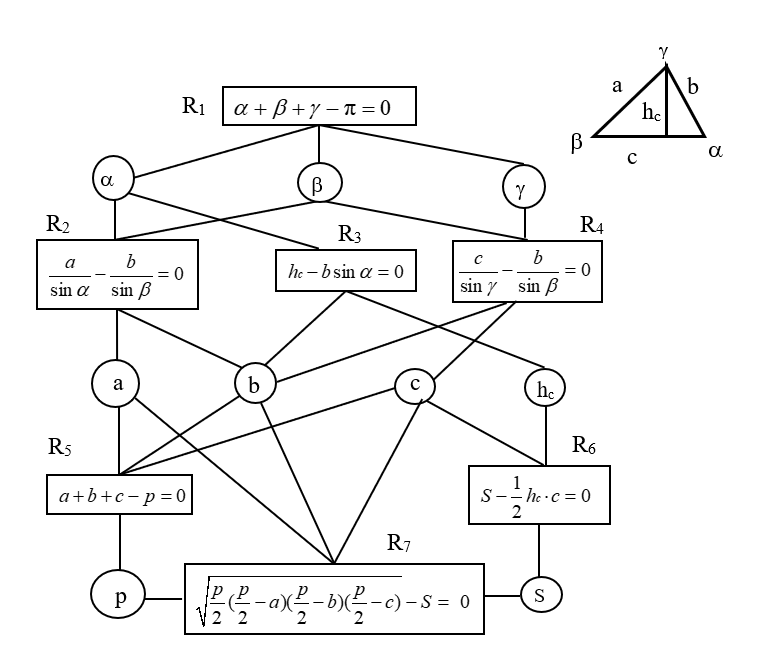

Здесь кружки соответствуют параметрам, а прямоугольники – функциональным отношениям между ними. Будем считать, что все отношения имеют разрешения относительно всех входящих в них параметров. Так, например, отношение **R6**  будет иметь три различных разрешения, показанных ниже.

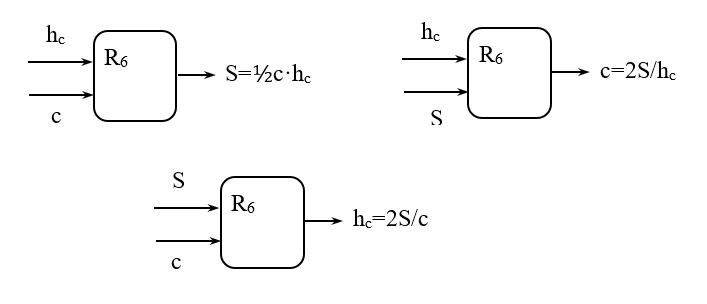

Пусть пользователю необходимо решить задачу:
«**Найти площадь треугольника $S$ по известной стороне $c$ и известным прилегающим углам $\alpha$ и $\beta$**».


Известно несколько методов вывода или планирования в ФСС.

Первый – метод распространяющейся волны. В наиболее простой форме он может быть описан следующим образом.

По условию задачи $c$,$\alpha$ и $\beta$ известны. Тогда в ФСС как бы возбуждаются вершины, соответствующие этим параметрам. Это возбуждение распространяется от них по ребрам к вершинам-прямоугольникам. Условием возбуждения этих вершин является возбуждение $(m - 1)$ ребра, подходящих к ним, где $m$ – число ребер, подходящих к вершинам-прямоугольникам. Возбуждение вершины-прямоугольника соответствует разрешению отношения, написанного внутри прямоугольника относительно параметра, которому соответствует невозбужденное ребро.

В нашем примере возбуждение вершин $c$, $\alpha$ и $\beta$  приведет на следующем шаге к возбуждению вершины-прямоугольника $R1$ и разрешению относительно $\gamma$. Далее возбуждение от вершин $c$, $\gamma$ и $\beta$ будет передано к вершине-прямоугольнику $R4$, которая возбудиться, дав разрешение относительно $b$. После этого произойдет возбуждение вершины-прямоугольника $R3$, которая даст разрешение относительно $h_c$ и, наконец, возбудится вершина-прямоугольник $R6$, дав разрешение относительно $S$. При возбуждении вершины, соответствующей $S$, прекращается распространение волны.

В последующей ячейке кода приведены программный модуль вычисления параметров. Для задания структуры сети используется пакет Networkx, функциональные отношения заданы с помощью пакета [SympPy](https://www.sympy.org/en/index.html).
(пакет для символьных вычислений на питоне, подобный системе Mathematica. Он работает с выражениями, содержащими символы. SymPy и Networkx уже установлен в Google Colab.)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from sympy.solvers import solve
from sympy import symbols, Eq, sin, sqrt
import numpy as np

# Семантическая сеть
class SemanticNet:
    def __init__(self, nodes_var, nodes_rel, edges, labels, relations, symbols):
        # Задаем структуру семантической сети в виде ненаправленного графа
        # Инициализируем объект - граф
        self.graph = nx.Graph()
        # Добавляем вершины-параметры (переменные)
        self.graph.add_nodes_from(nodes_var)
        # Добавляем вершины-функциональные отношения
        self.graph.add_nodes_from(nodes_rel)
        # Добавляем ребра
        self.graph.add_edges_from(edges)
        self.nodes_var = nodes_var
        self.nodes_rel = nodes_rel
        self.edges = edges
        self.active_edges = []
        # Устанавливаем порядок упорядочивания графа в случае визуализации
        self.pos = nx.shell_layout(self.graph)
        self.labels = labels
        self.symbols = symbols
        self.relations = relations
        self.reset_state()
        # Устанавливаем содержимое вершин-переменных
        for var in nodes_var:
          self.graph.nodes[var]['var'] = self.symbols[var]
        # Устанавливаем содержимое вершин-функций
        for rel in nodes_rel:
          self.graph.nodes[rel]['rel'] = self.relations[rel]

    # Функция сброса состояния вершин
    def reset_state(self):
        self.active_edges = []
        for node in self.graph.nodes:
          self.graph.nodes[node]['active'] = False

    # Функция визуализации графа
    def draw(self):
        options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 1.}
        nx.draw_networkx_nodes(self.graph, self.pos, nodelist=self.nodes_var,
                               **options)
        options['node_shape'] = 's'
        nx.draw_networkx_nodes(self.graph, self.pos, nodelist=self.nodes_rel,
                               **options)
        nx.draw_networkx_edges(self.graph, self.pos, width=1.0, alpha=0.5)
        nx.draw_networkx_edges(
            self.graph,
            self.pos,
            edgelist=self.edges,
            alpha=0.5,
        )
        nx.draw_networkx_labels(self.graph, self.pos, self.labels,
                                font_size=18, font_color="whitesmoke")
        plt.tight_layout()
        plt.axis("off")
        plt.show()

    # Метод прямой волны
    def forward(self, inputs, values, target):
        self.values = values
        print('Исходные вершины первого типа (переменные):', inputs)
        print('Целевая вершина первого типа (переменная):', target)
        self.reset_state()
        self.inputs = inputs
        self.target = target
        for input in self.inputs:
          if input not in self.nodes_var:
            print('Ошибка в задании исходных вершин первого типа (переменных)')
            return
        if target not in self.nodes_var:
            print('Ошибка в задании целевой вершины первого типа (переменной)')
            return
        if target in inputs:
            print('Целевая вершина первого типа уже присутствует в исходных вершинах')
            return
        # Активация изначальных вершин и прилегающих ребер
        for input_node in self.inputs:
          self.graph.nodes[input_node]['active'] = True
          print('Активация вершины', input_node)
          for neighbour in self.graph[input_node].keys():
            self.active_edges.append((neighbour, input_node))
            print('Активация ребра', (neighbour, input_node))

        # Цикл распространения прямой волны
        changed = True
        while changed:
          changed = False
          for edge in self.active_edges[::-1]:
            node = edge[0]
            if 'rel' in self.graph.nodes[edge[1]].keys(): node = edge[1]
            if (self.graph.nodes[node]['active'] == False):
              # Проверка условия активации вершины-функционального отношения
              m = len(self.graph[node].keys())
              active_inputs = 0
              non_active_input = None
              for neighbour in self.graph[node].keys():
                if self.graph.nodes[neighbour]['active']: active_inputs += 1
                else: non_active_input = neighbour
              if active_inputs >= m - 1:
                # Активация вершины-функционального отношения, прилегающих ребер и вершин-переменныз
                self.graph.nodes[node]['active'] = True
                changed = True
                print('Активация функционального отношения', node)
                if active_inputs == m - 1 and non_active_input != 'p' and node !='R7':
                  print(self.symbols[non_active_input], '=', solve(self.graph.nodes[node]['rel'], self.symbols[non_active_input])[0])
                  self.values[self.symbols[non_active_input]] = solve(self.graph.nodes[node]['rel'].subs(self.values), self.symbols[non_active_input])[0]
                print(self.values)
                for neighbour in self.graph[node].keys():
                  if ((node, neighbour) not in self.active_edges):
                    self.active_edges.append((node, neighbour))
                    print('Активация ребра', (node, neighbour))
                  if (self.graph.nodes[neighbour]['active'] == False):
                    self.graph.nodes[neighbour]['active'] = True
                    print('Активация вершины', neighbour)
                    for neighbour_inner in self.graph[neighbour].keys():
                      if ((neighbour_inner, neighbour) not in self.active_edges):
                        self.active_edges.append((neighbour_inner, neighbour))
                        print('Активация ребра', (neighbour_inner, neighbour))

          if (self.graph.nodes[target]['active']):
            print('Значение целевой переменной ', target, ' :', self.values[self.symbols[target]])
            return

        print('Значение целевой переменной недостижимо')


В последующей ячейке кода задаем предметную область и визуализируем граф.

In [ ]:
nodes_var = ['alpha', 'beta', 'gamma', 'a', 'b', 'c', 'h_c', 'p', 'S']
nodes_rel = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7']

edges = [
    ('R1', 'alpha'), ('R1', 'beta'), ('R1', 'gamma'),
    ('R2', 'alpha'), ('R2', 'beta'), ('R2', 'a'), ('R2', 'b'),
    ('R3', 'h_c'), ('R3', 'b'), ('R3', 'alpha'),
    ('R4', 'b'), ('R4', 'c'), ('R4', 'beta'),('R4', 'gamma'),
    ('R5', 'a'), ('R5', 'b'), ('R5', 'c'),('R5', 'p'),
    ('R6', 'S'), ('R6', 'h_c'), ('R6', 'c'),
    ('R7', 'a'), ('R7', 'b'), ('R7', 'c'), ('R7', 'p'), ('R7', 'S'),
]

labels = {
  'alpha': r"$\alpha$", 'beta': r"$\beta$", 'gamma': r"$\gamma$",
  'R1': r"$R1$", 'R2': r"$R2$", 'R3': r"$R3$", 'R4': r"$R4$",
  'R5': r"$R5$", 'R6': r"$R6$", 'R7': r"$R7$",
  'a': r"$a$", 'b': r"$b$", 'c': r"$c$", 'h_c': r"$h_c$",
  'p': r"$p$", 'S': r"$S$",
}

alpha, beta, gamma, pi, S, p, h_c, a, b, c = symbols('alpha beta gamma pi S p h_c a b c')
keys = ['alpha', 'beta', 'gamma', 'pi', 'S', 'p', 'h_c', 'a', 'b', 'c']
values = [alpha, beta, gamma, pi, S, p, h_c, a, b, c]
symbols = dict(zip(keys, values))
relations = {
  'R1': Eq(alpha + beta + gamma - pi, 0),
  'R2': Eq(a / sin(alpha) - b / sin(beta), 0),
  'R3': Eq(h_c - b * sin(alpha), 0),
  'R4': Eq(c * sin(gamma) - b * sin(beta), 0),
  'R5': Eq(a + b + c - p, 0),
  'R6': Eq((c * h_c) / 2 - S, 0),
  'R7': Eq(sqrt(p / 2 * (p / 2 - a) * (p / 2 - b)* (p / 2 - c)) - S, 0)
}

net = SemanticNet(nodes_var, nodes_rel, edges, labels, relations, symbols)
net.draw()

В последующей ячейке кода задаем условие задачи и вызываем метод прямой волны. Сначала будет выполнена вершина, вычисляющая значение параметра $\gamma$, затем последовательно будут вычислены значения параметров $b$, $a$, $h_c$, $S$. Задача вычисления площади треугольника $S$ по известной стороне c и известным прилегающим углам $\alpha$ и $\beta$ успешно выполнена.

In [ ]:
inputs = ['alpha', 'beta', 'c']
values = {alpha: np.radians(30.), beta: np.radians(25.), c: 10., pi: np.pi}
target = 'S'

net.forward(inputs, values, target)

---


# 6. Задания


---

**Задание 1.** Выполнить несколько запусков функциональной семантической сети с разными входными параметрами:
с корректно заданными исходными данными (входные переменные и целевая переменные, отличные от приведенных в примере),
с недостаточным количеством исходных данных.

**Задание 2.** Выполните, как минимум, 2 любые задачи из нижеприведенного списка. Приведите в отчете код и другие необходимые, на ваш взгляд, данные и графики.

**Задача 1.**

Задан Series объект s, найти индекс первого элемента отсортированного s, где значения больше 5.

In [ ]:
# задано изначально
import numpy as np
import pandas as pd

r = np.random.RandomState(1)
s = pd.Series(r.uniform(0, 10, 100))

# ваш код тут

**Задача 2.**

Имеется небольшой игрушечный DataFrame, в котором необходимо провести несколько типов фильтраций и отобразить результат:

* всех, кто старше 40
* всех, кто имеет доход выше среднего по датасету
* всех, кто имеет доход выше среднего по датасету, но надежность ниже среднего по датасету

создать новые столбцы:

* важность клиента = доход * надежность
* возможная долгосрочность клиента = важность клиента * (средний возраст по датасету - возраст клиента)

`подсказка: двойные условия записываются так: (условие 1) & (условие 2)`


** примечание: столбцы не имеют отношения к реальным формулам или моделям, они необходимы только для наглядности

In [ ]:
# создадим тестовый датасет
df = pd.DataFrame({
    'имя': ['Петя', 'Вася', 'Аня', 'Света'],
    'возраст': [45, 26, 41 , 21],
    'доход': [100000, 80000, 150000, 60000],
    'надежность клиента (0..1)': [0.65, 0.74, 0.87, 0.68],
    'пол': ['муж', 'муж', 'жен', 'жен']},
    index=[0, 1, 2, 3])

df

# ваш код тут


**Задача 3.**

Как объединить два DataFrame по двум столбцам так, чтобы остались только общие строки?

Объедините df1 и df2 по столбцам fruit-frukt и weight-ves.

In [ ]:
df1 = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,
                    'weight': ['low', 'medium', 'high'] * 3,
                    'price': np.random.randint(0, 100, 9)})

df2 = pd.DataFrame({'frukt': ['apple', 'banana', 'melon'] * 2,
                    'ves': ['low', 'high'] * 3,
                    'price': np.random.randint(0, 100, 6)})

# ваш код тут

**Задача 4.**
Сгенерировать и добавить номера телефонов следующего вида +7(000)000 00 00 в таблицу



In [ ]:
d = [{"Name": "Виктор", "Age": 18},
     {"Name": "Мария", "Age": 21},
     {"Name": "Иван", "Age": 19},
     {"Name": "Иван", "Age": 25},
     {"Name": "Алексей", "Age": 20}]

df = pd.DataFrame(d)

df

# ваш код тут

**Задача 5.**

Скачать файл по ссылке https://disk.yandex.ru/d/ZeDbB3rqhIr1NA , считать через pandas. Получить список уникальных значений - стран в колонке "Country", отфильтровать и получить данные только по выпускникам колледжа. Убрать строки с пропусками в данных (NaN). (В случае ошибок типов можете конвертировать колонки к нужным типам через .astype(str) или .astype(int). Подсчитать макс значение, среднее и СКО для числа детей (household_children) в отфильтрованных данных.

**Задача 6.**

Скачать файл по ссылке https://disk.yandex.ru/i/uoN5eQE1qPCXCQ , считать через pandas второй лист (Olympics). Отфильтровать данные по России и золотым медалистам, построить график разброса возраст-вид_спорта. Построить линейный график на следущих данных - df.groupby('Year').Age.mean().dropna(). Сохранить графики в pdf. Отфильтровать изначальные данные только по летнему сезону, убрать колонку Город, создать колонку Год рождения, вычислить её через Возраст и Дату проведения, датафрейм сохранить вместе с графиками в архиве и скачать (командами, не через GUI).

Задание 3. **(Необязательное)** Адаптировать программную реализацию к иной предметной области.


*Предметная область 1*.

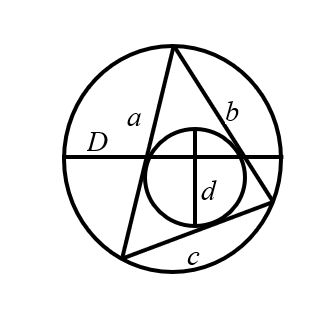

Переменные:

$a$ - сторона треугольника

$b$ - сторона треугольника

$c$ - сторона треугольника

$\alpha$ - угол треугольника

$\beta$ - угол треугольника

$\gamma$ - угол треугольника

$d$ - диаметр вписанной окружности

$D$ - диаметр описанной окружности

$p$ - периметр треугольника

$S$ - площадь треугольника


*Предметная область 2.*

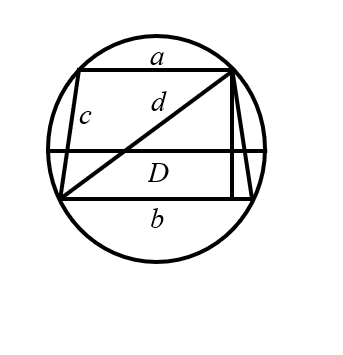

Переменные:

$a$ -	сторона трапеции

$b$ -	сторона трапеции

$c$ -	сторона трапеции

$\alpha$ - угол трапеции

$h$ -	высота

$d$ -	диагональ

$D$	- диаметр описанной окружности

$p$	- периметр трапеции

$S$ -	площадь трапеции


---


# 7. Выполнение работы


---

1. Изучить теоретический и практический материал лабораторной работы.
2. Выполнить, задания 1 и задания 2 из раздела 6.
3. Оформить отчёт о выполненной работе.



---


# 8. Отчет


---
Оформить отчёт со следующим содержанием:
* Титульный лист.
* Введение (цель работы, постановка задачи).
* Ход выполнения заданий и описание результатов.
Приведите решение задач в виде кода, скриншоты результатов тестирования.
* Заключение (выводы).

Отчет должен быть оформлен согласно требованиям ОС ТУСУР (https://regulations.tusur.ru/documents/70).